<a href="https://colab.research.google.com/github/thekishanpatel/FastAi/blob/master/SGD_Polynomial_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
from fastai.basics import *

# **Stochastic Gradient Descent (SGD)**

In [2]:
n = int(input("Enter Your Desired Size of the Dataset: "))
x1 = torch.ones(n, 2);
x1[:,0].uniform_(-1., 1);
x1, indicies = torch.sort(x1, 0) # Sorted for the purposes of the animation later on. If you don't want to sort, simply change the plt.plot to plt.scatter in the last secition
x1[:10]

Enter Your Desired Size of the Dataset: 500


tensor([[-0.9988,  1.0000],
        [-0.9961,  1.0000],
        [-0.9930,  1.0000],
        [-0.9918,  1.0000],
        [-0.9882,  1.0000],
        [-0.9771,  1.0000],
        [-0.9741,  1.0000],
        [-0.9692,  1.0000],
        [-0.9686,  1.0000],
        [-0.9684,  1.0000]])

In [5]:
degree = int(input("Please Enter the Degree of the Polynomial: "))
b = input("Please Enter 'Degree + 1' values for Coefficients, starting with highest degree: ").split(sep = ' ')
b = [float(i) for i in b]
ainit = torch.as_tensor(b); print(ainit)

Please Enter the Degree of the Polynomial: 2
Please Enter 'Degree + 1' values for Coefficients, starting with highest degree: 6.5 0.5 1
tensor([6.5000, 0.5000, 1.0000])


# Model (Polynomial)

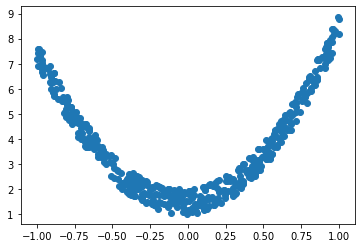

In [6]:
x = torch.ones(n, degree + 1)
for i in range(0, degree + 1, 1):
  x[:, len(x[1]) - 1 - i] = pow(x1[:,0], i)
y = x@ainit + torch.rand(n)
plt.scatter(x1[:,0], y)

# **Loss Function** (MSE)

In [0]:
def mse(y, yhat): return((yhat - y)**2).mean()

In [8]:
b = input("Enter your initial predictions for 'Degree + 1' Coefficients, starting with highest degree: ").split(sep = " ")
b = [float(i) for i in b]
a = torch.as_tensor(b); # Initial Prediction
yhat = x@a
mse(y, yhat)

Enter your initial predictions for 'Degree + 1' Coefficients, starting with highest degree: -1 1 1


tensor(13.4550)

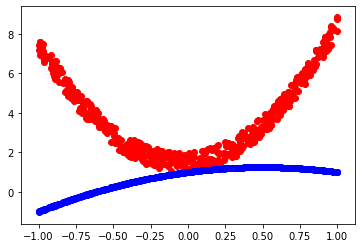

In [9]:
plt.scatter(x1[:,0], y, c = "red")
plt.scatter(x1[:,0], yhat, c = 'blue')

# **Gradient Descent**

In [10]:
ai = a;
a = nn.Parameter(a); a

Parameter containing:
tensor([-1.,  1.,  1.], requires_grad=True)

In [0]:
def update():
  yhat = x@a
  loss = mse(y, yhat)
  loss.backward() # The derivate
  with torch.no_grad():
    a.sub_(lr * a.grad)
    a.grad.zero_()
  return loss

In [12]:
lr = float(input("Enter Learning Rate: ")); 
stop = float(input("Enter Stopping Criteria: "));
losso = 0; t = 0;
while(True):
  l = update()
  if(abs(l - losso) <= stop): break
  losso = l
  if t % 10 == 0: print(l);
  t += 1

Enter Learning Rate: .1
Enter Stopping Criteria: .0001
tensor(13.4550, grad_fn=<MeanBackward0>)
tensor(2.8615, grad_fn=<MeanBackward0>)
tensor(2.0637, grad_fn=<MeanBackward0>)
tensor(1.5344, grad_fn=<MeanBackward0>)
tensor(1.1492, grad_fn=<MeanBackward0>)
tensor(0.8672, grad_fn=<MeanBackward0>)
tensor(0.6604, grad_fn=<MeanBackward0>)
tensor(0.5086, grad_fn=<MeanBackward0>)
tensor(0.3972, grad_fn=<MeanBackward0>)
tensor(0.3155, grad_fn=<MeanBackward0>)
tensor(0.2555, grad_fn=<MeanBackward0>)
tensor(0.2114, grad_fn=<MeanBackward0>)
tensor(0.1791, grad_fn=<MeanBackward0>)
tensor(0.1553, grad_fn=<MeanBackward0>)
tensor(0.1379, grad_fn=<MeanBackward0>)
tensor(0.1251, grad_fn=<MeanBackward0>)
tensor(0.1157, grad_fn=<MeanBackward0>)
tensor(0.1089, grad_fn=<MeanBackward0>)
tensor(0.1038, grad_fn=<MeanBackward0>)
tensor(0.1001, grad_fn=<MeanBackward0>)
tensor(0.0974, grad_fn=<MeanBackward0>)
tensor(0.0954, grad_fn=<MeanBackward0>)
tensor(0.0939, grad_fn=<MeanBackward0>)


The optimized parameters are tensor([6.2979, 0.5069, 1.5781])
The original parameters were tensor([6.5000, 0.5000, 1.0000])


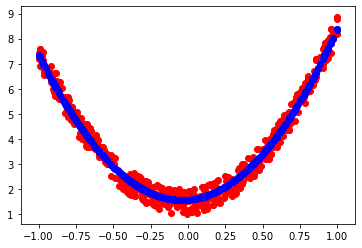

In [13]:
plt.scatter(x1[:,0], y, c = "red")
plt.scatter(x1[:,0], x@a.data, c = "blue")
print("The optimized parameters are {}".format(a.data))
print("The original parameters were {}".format(ainit))

# **Animate the Optimization**

In [14]:
from matplotlib import animation, rc
rc('animation', html = 'jshtml')
a = torch.as_tensor(b);
a = nn.Parameter(a)
fig = plt.figure()
plt.scatter(x1[:,0], y, c = "red")
line, = plt.plot(x1[:,0], x@a.data)
plt.close()

def animate(i):
  update()
  line.set_ydata(x@a.data)
  return line,

animation.FuncAnimation(fig, animate, np.arange(0, t), interval = 20)